In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics


In [26]:
house_price_dataset=sklearn.datasets.load_boston()
house_price_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [27]:
house_df=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
df_target=pd.DataFrame(house_price_dataset.target,columns=['Price'])
df_target.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [29]:
house_df['Price']=house_price_dataset.target
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
house_df.shape

(506, 14)

In [31]:
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [37]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

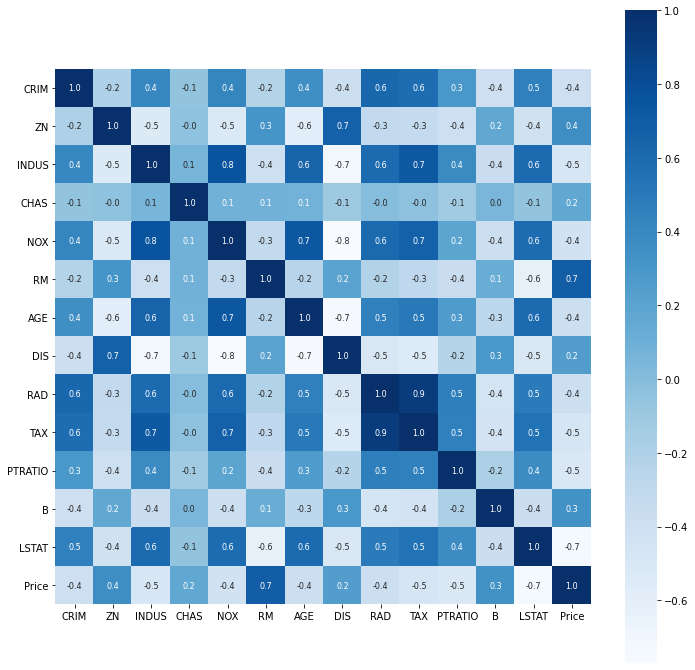

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(house_df.corr(),cbar=True,square=True,fmt='.1f',cmap='Blues',annot=True,annot_kws={'size':8})

In [52]:
X=house_df.drop('Price',axis=1)
Y=house_df['Price']
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [53]:
#training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [56]:
x_train.shape

(404, 13)

In [57]:
x_test.shape

(102, 13)

In [60]:
#model training
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [65]:
train_predict=model.predict(x_train)

In [68]:
train_predict

array([25.01156658, 23.20086342, 19.63206629, 30.79723661, 13.29598163,
       12.35655178, 21.17619058, 11.52105413, 13.48284934, 23.29619143,
       16.67181245, 11.9640623 , 32.53526883, 25.38737924, 29.80188665,
       19.51269487, 24.14966495, 24.10079632, 30.6933436 , 19.14366521,
       33.53309203,  3.93459665, 41.11203484, 24.48533152, 20.09948308,
       23.54618062, 21.50057915, 25.02443747, 22.39275602, 33.67942244,
       25.49286716,  8.07877994, 17.45164918, 10.02711469, 20.30483806,
       12.97802751, 18.36662544, 25.4320083 , 14.00655745, 17.89557148,
       24.77620977, 28.90131112, 17.27439484, 23.1865498 , 12.62489379,
       11.32274928, 27.4978866 , 19.49269776, 44.80229099, 16.9529603 ,
       22.44602306, 33.66680303, 20.2706101 , 20.70205114, 20.98558754,
       21.63228494, 27.05322369, 33.11940621, 25.61757987, 32.73314444,
       20.91920151, 41.11899411, 15.32086807,  8.42394611, 22.84480968,
       13.72210624, 28.60744627, 17.09291577, 26.76454185, 39.14

In [69]:
#r squared error
score_1=metrics.r2_score(y_train,train_predict)
#mean absolute error
score_2=metrics.mean_absolute_error(y_train,train_predict)

In [75]:
print('R squared error :', score_1)
print('Mean absolute error :',score_2)

R squared error : 0.7285831776605591
Mean absolute error : 3.384457539916797


In [76]:
test_predict=model.predict(x_test)
test_predict

array([23.01506153, 21.2115869 , 33.71590384, 31.56542369,  3.1826268 ,
        3.15381954, 27.40305304, 22.2126176 , 14.86506114, 21.34105453,
       30.95942941, 26.70065029, 21.12624382, 18.37282564, 17.64315354,
       25.38194186, 24.42970445, 13.36957057,  8.66686786, 18.57490534,
       21.73966467, 20.34270529, 36.5461105 , 20.59627495, 19.87979627,
       15.75766967, 37.11632999, 34.85897895, 30.83458635, 23.23441285,
       18.68278505, 20.749546  , 31.84560076, 30.20214207, 13.3861702 ,
       15.87078398, 13.70766096, 23.74163998, 25.95135088, 23.18325878,
       28.99906539, 12.50341936, 31.08347911,  6.39401895, 23.71801218,
       20.61523929, 33.15362417, 19.21862493, 35.89603081,  0.82365329,
       31.90288611, 31.69640543,  6.58849712, 34.62762996, 20.41162545,
       19.69277608, 19.53445865, 18.58689088, 15.81420496, 22.98764309,
       19.65947045, 16.36377019, 18.48783369, 32.76568172, 35.49022568,
       24.58349631, 41.5854766 , 32.94818456, 14.60990256, 27.43

In [77]:
#r squared error
score_3=metrics.r2_score(y_test,test_predict)
#mean absolute error
score_4=metrics.mean_absolute_error(y_test,test_predict)

In [78]:
print("R squared error:",score_3)
print("Mean absolute error:",score_4)

R squared error: 0.7789207451814422
Mean absolute error: 3.1130437468934176


In [79]:
y_test.head()

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
Name: Price, dtype: float64

Text(0.5, 1.0, 'Actual Price vs. Predicted Prices')

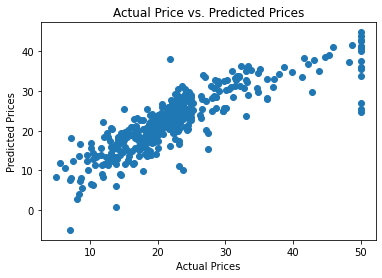

In [82]:
plt.scatter(y_train,train_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual Price vs. Predicted Prices")

/home/suman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

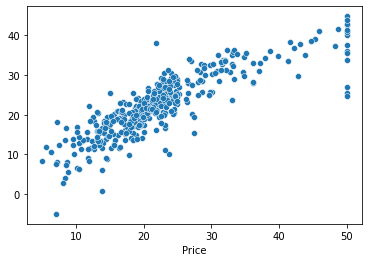

In [85]:
sns.scatterplot(y_train,train_predict)